In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["font.family"] = "serif"

In [2]:
dataset = pd.read_csv('BTS.csv')

In [3]:
print(dataset)

    Set  Temp  Sample Cycle  ...      σm1      σm2  Avg (σm1, σm2)  FR
0     I    25       1     a  ...  0.00000  0.00000         0.00000 NaN
1     I    25       2     a  ...  0.00000  0.00000         0.00000 NaN
2     I    25       3     a  ...  0.00000  0.00000         0.00000 NaN
3     I   250       1     a  ...  0.00000  0.00000         0.00000 NaN
4     I   250       2     a  ...  0.00000  0.00000         0.00000 NaN
..  ...   ...     ...   ...  ...      ...      ...             ...  ..
80  III  1000       2     b  ...  0.21797  0.39261         0.30529 NaN
81  III  1000       2     c  ...  0.21797  0.39261         0.30529 NaN
82  III  1000       3     a  ...  0.27870  0.37902         0.32886 NaN
83  III  1000       3     b  ...  0.27870  0.37902         0.32886 NaN
84  III  1000       3     c  ...  0.27870  0.37902         0.32886 NaN

[85 rows x 9 columns]


In [4]:
X = dataset.iloc[ : , 0:5].values
y = dataset.iloc[ : , -2].values

In [5]:
print(y)

[0.       0.       0.       0.       0.       0.       0.       0.
 0.       0.       0.       0.       0.       0.       0.       0.07093
 0.07093  0.07418  0.07418  0.074325 0.074325 0.188905 0.188905 0.19437
 0.19437  0.197425 0.197425 0.07816  0.07816  0.119745 0.119745 0.872095
 0.872095 0.12395  0.12395  0.60301  0.60301  0.04706  0.04706  0.14284
 0.14284  0.139935 0.139935 1.092115 1.092115 1.092115 1.096785 1.096785
 1.096785 0.619015 0.619015 0.619015 0.87483  0.87483  0.87483  1.2274
 1.2274   1.2274   0.60072  0.60072  0.60072  2.006955 2.006955 2.006955
 0.62671  0.62671  0.62671  1.228225 1.228225 1.228225 1.70816  1.70816
 1.70816  1.45064  1.45064  1.45064  0.42009  0.42009  0.42009  0.30529
 0.30529  0.30529  0.32886  0.32886  0.32886 ]


In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 0] = le.fit_transform(X[:, 0])

In [7]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 3] = le.fit_transform(X[:, 3])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

In [9]:
ada=AdaBoostRegressor()
search_grid={'n_estimators':[50,100,500,1000,2000],'learning_rate':[.001,0.01,.1,1],'random_state':[1]}
search=GridSearchCV(estimator=ada,param_grid=search_grid,scoring='neg_mean_squared_error',n_jobs=1)

In [10]:
search.fit(X_train,y_train)
search.best_params_

{'learning_rate': 0.001, 'n_estimators': 100, 'random_state': 1}

In [11]:
model_ABR = AdaBoostRegressor(base_estimator=None, learning_rate=0.001, loss='linear', n_estimators=100, random_state=None)
model_ABR.fit(X_train, y_train)
print(model_ABR)

AdaBoostRegressor(base_estimator=None, learning_rate=0.001, loss='linear',
                  n_estimators=100, random_state=None)


In [12]:
expected_y  = y_test
predicted_y = model_ABR.predict(X_test)

In [13]:
print(predicted_y)

[0.         0.         0.94476469 0.23549109 0.94490875 0.27664375
 0.93233273 0.42009    0.93917773 0.93143    0.         0.17633115
 0.16658278]


In [14]:
print(metrics.r2_score(expected_y, predicted_y))
print(metrics.mean_squared_log_error(expected_y, predicted_y))
print(metrics.mean_squared_error(expected_y, predicted_y))

0.7071737559695723
0.0213713089119455
0.10726039144768838


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


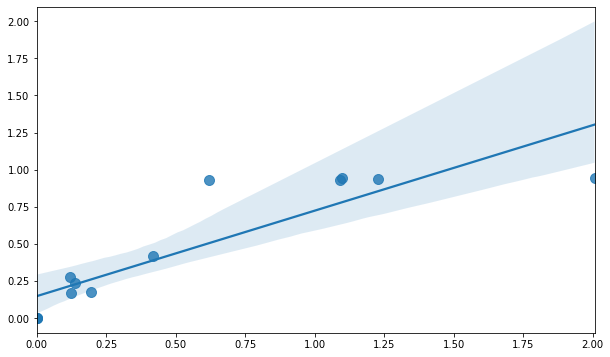

In [15]:
plt.figure(figsize=(10,6))
sns.regplot(expected_y, predicted_y, fit_reg=True, scatter_kws={"s": 100})

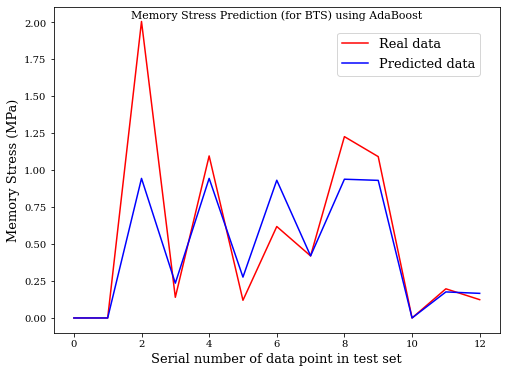

In [44]:
plt.figure(figsize=(8, 6))
plt.plot(y_test, color = 'red', label = 'Real data')
plt.plot(predicted_y, color = 'blue', label = 'Predicted data')
plt.xlabel('Serial number of data point in test set', fontsize=13)
plt.ylabel('Memory Stress (MPa)',fontsize=13)
plt.title('Memory Stress Prediction (for BTS) using AdaBoost', position=(0.5, 0.945),size=11)
plt.legend(bbox_to_anchor=(0.97,0.94), fontsize=13)
plt.savefig("BTS (AdaBoost)",dpi=1500,bbox_inches = 'tight')
plt.show()